In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
def load_data(file_path):
    """Load the dataset from a CSV file."""
    stock_data = pd.read_csv('/kaggle/input/microsoft-stock-time-series-analysis/Microsoft_Stock.csv')
    return stock_data

In [3]:

def preprocess_data(stock_data):
    """Preprocess the dataset."""
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    stock_data.set_index('Date', inplace=True)
    stock_data['Daily_Return'] = stock_data['Close'].pct_change()
    stock_data['MA_30'] = stock_data['Close'].rolling(window=30).mean()
    stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
    return stock_data

def visualize_stock_data(stock_data):
    """Visualize stock market analysis."""
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.plot(stock_data.index, stock_data['MA_30'], label='30-day Moving Average')
    plt.plot(stock_data.index, stock_data['MA_50'], label='50-day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Market Analysis')
    plt.legend()
    plt.show()

def perform_stock_forecasting(stock_data):
    """Perform stock price forecasting."""
    stock_data = stock_data[['Close']].copy()
    stock_data.reset_index(inplace=True)
    stock_data.set_index('Date', inplace=True)

    # Fit the ARIMA model with order (1, 0, 0)
    model = ARIMA(stock_data['Close'], order=(1, 0, 0))
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(stock_data), end=len(stock_data) + 90)

    forecast_index = pd.date_range(start=stock_data.index[-1], periods=len(forecast) + 1, freq='D')[1:]
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Actual Price')
    plt.plot(forecast_index[:len(forecast)], forecast, label='Forecasted Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Price Forecasting')
    plt.legend()
    plt.show()

    # Evaluation metrics
    actual_values = stock_data['Close'].values[-len(forecast):]
    mse = mean_squared_error(actual_values, forecast)
    rmse = mse ** 0.5
    print("Root Mean Squared Error (RMSE):", rmse, "(in terms of price)")


def perform_trend_analysis(stock_data):
    """Perform trend analysis."""
    stock_data['Year'] = stock_data.index.year
    X = stock_data['Year'].values.reshape(-1, 1)
    y = stock_data['Close'].values.reshape(-1, 1)
    regressor = LinearRegression()
    regressor.fit(X, y)
    trend = regressor.predict(X)
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Actual')
    plt.plot(stock_data.index, trend, label='Trend')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Trend Analysis')
    plt.legend()
    plt.show()

def perform_correlation_analysis(stock_data):
    """Perform correlation analysis."""
    corr_matrix = stock_data[['Close', 'Volume']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [4]:
# Load data
stock_data = load_data('C:/Users/Hetvi/Downloads/Microsoft_Stock.csv')
print(stock_data.head())  # Display the first few rows of the dataset
print(stock_data.info())  # Get information about the dataset (e.g., data types, missing values)
print(stock_data.describe())  # Check the summary statistics of the dataset


                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB
None
              Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472 

In [5]:
# Preprocess data
stock_data = preprocess_data(stock_data)

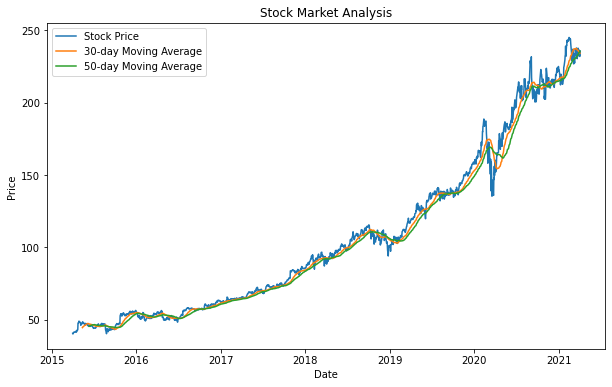

In [6]:
# Visualize stock data
visualize_stock_data(stock_data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

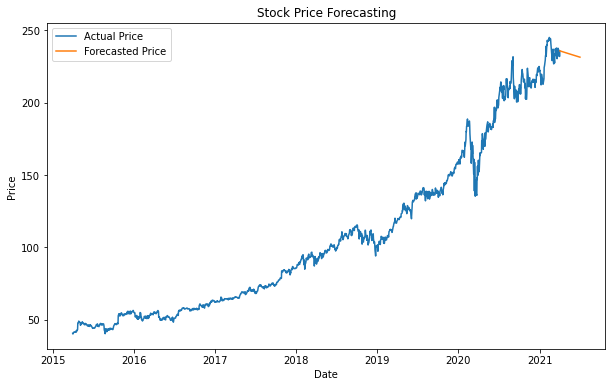

Root Mean Squared Error (RMSE): 13.479416505263304 (in terms of price)


In [7]:
# Perform stock price forecasting
perform_stock_forecasting(stock_data)

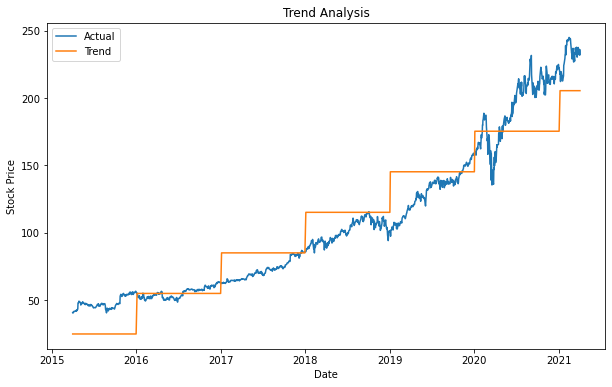

In [8]:
# Perform trend analysis
perform_trend_analysis(stock_data)

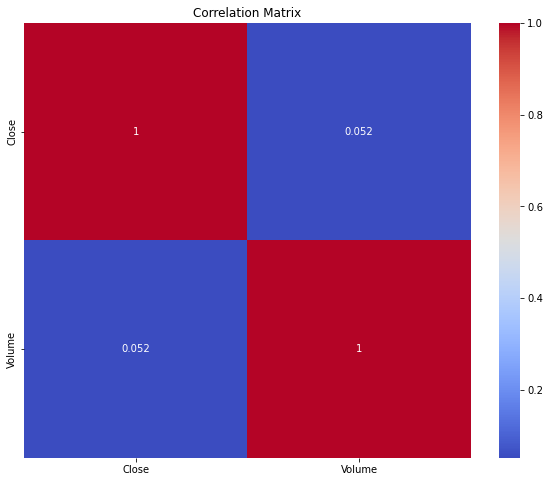

In [9]:
# Perform correlation analysis
perform_correlation_analysis(stock_data)